In [1]:
import kagglehub
import os
import pandas as pd

path  = kagglehub.dataset_download("olistbr/brazilian-ecommerce")
items = pd.read_csv(os.path.join(path, 'olist_order_items_dataset.csv'))
export_path = "../../exports/revenue"


c:\Users\Hunain Mulla\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Top 4% sellers forms 50% of the marketplace revenue

In [2]:
seller_rev = (
    items.assign(revenue=items["price"] + items["freight_value"])
         .groupby("seller_id", as_index=False)["revenue"]
         .sum()
         .rename(columns={"revenue": "total_revenue"})
         .sort_values("total_revenue", ascending=False)
         .reset_index(drop=True)
)


total_rev = seller_rev["total_revenue"].sum()
seller_rev["cumulative_pct"] = seller_rev["total_revenue"].cumsum() / total_rev

top_sellers = seller_rev[seller_rev["cumulative_pct"] <= 0.5]

print("=" * 55)
print(f"Total sellers: {len(seller_rev):,}")
print(f"Total revenue: ${total_rev:,.2f}")
print("=" * 55)
print(f"\n Sellers generating 50% of revenue: {len(top_sellers)}")
print(f"   {len(top_sellers) / len(seller_rev) * 100:.1f}% of all sellers\n")

print("Top sellers (50% of revenue):")
print(
    top_sellers[["seller_id", "total_revenue", "cumulative_pct"]]
    .assign(cumulative_pct=lambda x: (x["cumulative_pct"] * 100).round(2))
    .to_string(index=True)
)

Total sellers: 3,095
Total revenue: $15,843,553.24

 Sellers generating 50% of revenue: 135
   4.4% of all sellers

Top sellers (50% of revenue):
                            seller_id  total_revenue  cumulative_pct
0    4869f7a5dfa277a7dca6462dcf3b52b2      249640.70            1.58
1    7c67e1448b00f6e969d365cea6b010ab      239536.44            3.09
2    53243585a1d6dc2643021fd1853d8905      235856.68            4.58
3    4a3ca9315b744ce9f8e9374361493884      235539.96            6.06
4    fa1c13f2614d7b5c4749cbc52fecda94      204084.73            7.35
5    da8622b14eb17ae2831f4ac5b9dab84a      185192.32            8.52
6    7e93a43ef30c4f03f38b393420bc753a      182754.05            9.67
7    1025f0e2d44d7041d6cf58b6550e0bfa      172860.69           10.76
8    7a67c85e85bb2ce8582c35f2203ad736      162648.38           11.79
9    955fee9216a65b617aa5c0531780ce60      160602.68           12.80
10   6560211a19b47992c3666cc44a7e94c0      151265.77           13.76
11   1f50f920176fa81dab994

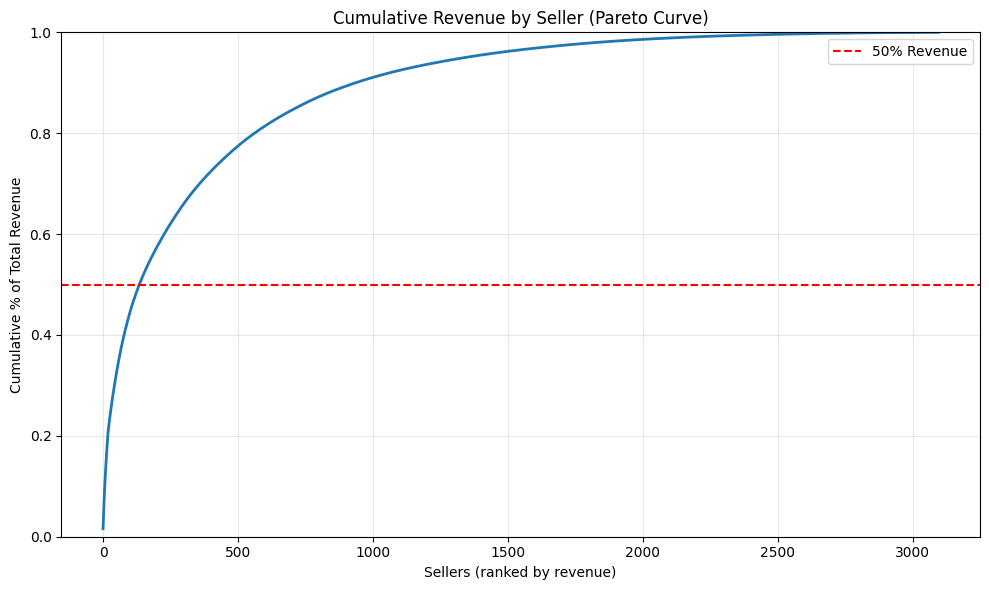

In [ ]:
import matplotlib.pyplot as plt


seller_rev["cumulative_pct"] = (
    seller_rev["total_revenue"].cumsum() / seller_rev["total_revenue"].sum()
)

plt.figure(figsize=(10, 6))
plt.plot(seller_rev["cumulative_pct"], linewidth=2)

# 50% reference line
plt.axhline(0.5, color="red", linestyle="--", label="50% Revenue")


plt.title("Cumulative Revenue by Seller (Pareto Curve)")
plt.xlabel("Sellers (ranked by revenue)")
plt.ylabel("Cumulative % of Total Revenue")
plt.ylim(0, 1)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
image_path = os.path.join(export_path,"visualizations")
os.makedirs(image_path,exist_ok=True)
plt.savefig(os.path.join(image_path, "elbow_silhouette_plot.png"), dpi=300, bbox_inches="tight")
plt.show()